<style type="text/css">
    .align-center {text-align: center; margin: auto;}
    h1 {
      color: #D41212;
      font-family: Impact;
      font-weight: bold;
      font-size: 280%;
      text-align: center;
      text-transform: uppercase;
    }
    h2 {
      color: #11A6D9;
      font-family: Tahoma;
      font-size: 230%;
    }
    h3 {
      color: #14D65F;
      font-family: Verdana;
      font-size: 160%;
      margin-left: 1.5em;
    }
    h4 {
      color: #FBC623;
      font-family: Verdana;
      font-size: 160%;
      margin-left: 3em;
    }
</style>
<body style = "text-align:justify">

<div class="align-center">
  <img src="https://minas.medellin.unal.edu.co/images/Escudo_color.png" title="UNAL" alt="UNAL" width="400">
</div>

# **REGRESIÓN POR MÍNIMOS CUADRADOS ORDINARIOS**

___
___

#### Autor

  + [Jeison Mauricio Alarcón Becerra](https://jeison-alarcon.netlify.app/)

#### Tabla de contenidos

  + [Introducción](#Introducción)
  + [Breve Historia](#Breve-Historia)
  + [Planteamiento del Algoritmo](#Planteamiento-del-Algoritmo)
    + [Estimación de los parámetros](#Estimación-de-los-parámetros)
  + [Ejemplo de aplicación con datos reales](#Ejemplo-de-aplicación-con-datos-reales)
    + [Programando el método de forma manual](#Programando-el-método-de-forma-manual)
    + [Usando la librería statsmodels](#Usando-la-librería-$\texttt{statsmodels}$)
    + [Usando la librería sklearn](#Usando-la-librería-$\texttt{sklearn}$)
  + [Conclusión](#Conclusión)
  + [Referencias y enlaces de interés](#Referencias-y-enlaces-de-interés)

___

## *Introducción*

El análisis de regresión se refiere a un conjunto de técnicas para predecir una variable utilizando una o más variables explicativas. Se trata esencialmente de crear un modelo para estimar una variable en función de los valores de otras. La regresión lineal simple es un análisis de regresión en su forma más básica: se utiliza para predecir una variable de resultado continua a partir de una(s) variable(s) explicativa(s) continua(s). La [regresión lineal simple](https://en.wikipedia.org/wiki/Linear_regression) se puede concebir como el proceso de dibujar una línea para representar una asociación entre dos variables en un diagrama de dispersión y usar esa línea como modelo lineal para predecir el valor de una variable (*resultado*) a partir del valor de la otra(s) (*variable(s) explicativa(s)*).

<div class="align-center">
  <img src="http://media5.datahacker.rs/2021/01/151-1.jpg" title="Implement Linear Regression" alt="Implement Linear Regression" width="400">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png" title="Linear Regression" alt="Linear Regression" width="400">
</div>

La regresión lineal es la base de muchos análisis, pues este método estadístico nos permite resumir y estudiar las relaciones entre dos variables continuas (cuantitativas), todo con el fin de predecir valores de una variable a partir de otra cuando existe una relación entre las dos variables.
A veces, los datos deben transformarse para cumplir con los requisitos del análisis, o se debe tener en cuenta una incertidumbre excesiva en la variable $X$. Si no se cumplen los requisitos para el análisis de regresión lineal, se pueden utilizar métodos alternativos no paramétricos robustos.

___

## *Breve Historia*

Lo primero que debe saber sobre la regresión lineal es cómo se llegó a aplicar el extraño término regresión a modelos como este. Fueron estudiados en profundidad por primera vez por un científico del siglo XIX, <b><u>Sir Francis Galton</u></b>. Galton fue un naturalista, antropólogo, astrónomo y estadístico autodidacta.

<center>
    <img src="https://devopedia.org/images/article/73/3617.1605427356.jpg" title="Francis Galton and regression to the mean" alt="Francis Galton and regression to the mean" width="400"
</center>

Galton fue un pionero en la aplicación de métodos estadísticos a las mediciones en muchas ramas de la ciencia, y al estudiar los datos sobre los tamaños relativos de los padres y su descendencia en varias especies de plantas y animales, observó el siguiente fenómeno: un padre mayor que el promedio tiende a producir un hijo más grande que el promedio, pero es probable que el hijo sea más pequeño que el padre en términos de su posición relativa dentro de su propia generación.

Galton denominó a este fenómeno una regresión hacia la mediocridad, que en términos modernos es una regresión a la media. Para un observador ingenuo, esto podría sugerir que las generaciones posteriores exhibirán menos variabilidad, literalmente más mediocridad, que las anteriores, pero ese no es el caso. Es un fenómeno puramente estadístico.

___

## *Planteamiento del Algoritmo*

Sea el modelo de regresión con $m$ variables explicativas,

$$y_i = \beta_0 + x_{i1}\beta_1 + \cdots + x_{im}\beta_m + \epsilon_i \quad i = 1, \cdots, n$$

La expresión del modelo lineal en forma matricial es:

$$
\begin{pmatrix}
  y_1 \\
  y_2 \\
  \vdots \\
  y_n
\end{pmatrix} =
\begin{pmatrix}
  1 & x_{11} & x_{12} & \cdots & x_{1m} \\
  1 & x_{21} & x_{22} & \cdots & x_{2m} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  1 & x_{n1} & x_{n2} & \cdots & x_{nm}
\end{pmatrix}
\begin{pmatrix}
  \beta_1 \\
  \beta_2 \\
  \vdots \\
  \beta_m
\end{pmatrix} +
\begin{pmatrix}
  \epsilon_1 \\
  \epsilon_2 \\
  \vdots \\
  \epsilon_n
\end{pmatrix}
$$

o de forma resumida:

$$\boldsymbol{Y} = \boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$

donde,

  + $\boldsymbol{Y}$ es un vector $n \times 1$ de observaciones de $\boldsymbol{Y}$.
  + $\boldsymbol{X}$ es una matriz $n \times m$ de observaciones de las variables explicativas.
  + $\boldsymbol{\epsilon}$ es un vector $n \times 1$ de perturbaciones no observables.

### Estimación de los parámetros

La estimación de los $\boldsymbol{\beta} = (\beta_0, \beta_1, \cdots, \beta_m)^{'}$ se hace con el criterio de los mínimos cuadrados. Se trata de hallar el conjunto de valores de los parámetros $\boldsymbol{\widehat{\beta}} = (\widehat{\beta_0}, \widehat{\beta_1}, \cdots, \widehat{\beta_m})^{'}$ que minimicen la siguiente suma de cuadrados,

$$\boldsymbol{\epsilon}^{'}\boldsymbol{\epsilon} = (\boldsymbol{Y}-\boldsymbol{X}\boldsymbol{\beta})^{'}(\boldsymbol{Y}-\boldsymbol{X}\boldsymbol{\beta})$$

Desarrollando la suma de cuadrados y derivando matricialmente respecto a $\boldsymbol{\beta}$ se llega a que toda estimación mínimo-cuadrática de $\boldsymbol{\beta}$ es solución de la ecuación,

\begin{align*}
    \boldsymbol{\epsilon}^{'} \boldsymbol{\epsilon} &= (\boldsymbol{Y}-\boldsymbol{X} \boldsymbol{\beta})^{'}(\boldsymbol{Y}-\boldsymbol{X} \boldsymbol{\beta}) \\
    &= \boldsymbol{Y}^{\prime} \boldsymbol{Y}-\boldsymbol{\beta}^{\prime} \boldsymbol{X}^{\prime} \boldsymbol{Y}-\boldsymbol{Y}^{\prime} \boldsymbol{X} \boldsymbol{\beta}+\boldsymbol{\beta}^{\prime} \boldsymbol{X}^{\prime} \boldsymbol{X} \boldsymbol{\beta} \\
    &= \boldsymbol{Y}^{\prime} \boldsymbol{Y}-2 \boldsymbol{\beta}^{\prime} \boldsymbol{X}^{\prime} \boldsymbol{Y}+\boldsymbol{\beta}^{\prime} \boldsymbol{X}^{\prime} \boldsymbol{X} \boldsymbol{\beta} \\
    \frac{\partial \boldsymbol{\epsilon}^{'} \boldsymbol{\epsilon}}{\partial \boldsymbol{\beta}} &= -2 \boldsymbol{X}^{\prime} (\boldsymbol{Y} - \boldsymbol{X} \boldsymbol{\beta}) = 0 \\
    \boldsymbol{X}^{'} \boldsymbol{X} \boldsymbol{\beta} &= \boldsymbol{X}^{'} \boldsymbol{Y}
\end{align*}

Si el rango es máximo y $r = m$ entonces $\boldsymbol{X}^{'}\boldsymbol{X}$ tiene inversa y la única solución de las ecuaciones normales es,
$$\widehat{\boldsymbol{\beta}} = (\boldsymbol{X}^{'}\boldsymbol{X})^{-1}\boldsymbol{X}^{'}\boldsymbol{Y}$$

___

## *Ejemplo de aplicación con datos reales*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
Boston = load_boston()
print(Boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
pd.DataFrame(Boston.data, columns = Boston.feature_names).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X = Boston.data[:,5]
y = Boston.target

<AxesSubplot:>

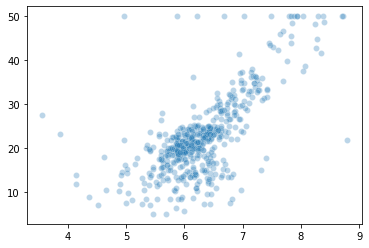

In [5]:
sns.scatterplot(x = X, y = y, alpha = 0.3)

### Programando el método de forma manual

In [6]:
# Añadiendo la columna de 1 para el intercepto
X = np.array([np.ones(len(X)), X]).T
Beta = np.linalg.inv(X.T@X) @ X.T @ y
Beta

array([-34.67062078,   9.10210898])

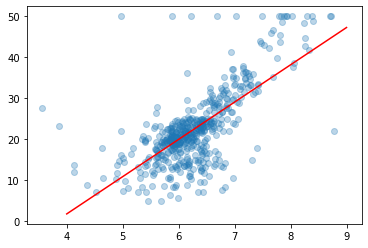

In [7]:
plt.scatter(X[:,1], y, alpha = 0.3)
plt.plot([4, 9], [Beta[0] + Beta[1]*4, Beta[0] + Beta[1]*9], c = "red")
plt.show()

### Usando la librería $\texttt{statsmodels}$

In [8]:
X = Boston.data[:,5]
y = Boston.target

In [9]:
# Este proporciona funciones para la estimación de modelos estadísticos.
import statsmodels.api as sm
Modelo = sm.OLS(y, sm.add_constant(X)).fit()
Modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           2.49e-74
Time:                        12:26:44   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
x1             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Permite ajustar modelos estadísticos utilizando fórmulas de estilo R.
import statsmodels.formula.api as smf
Modelo = smf.ols(formula = "y ~ X", data = pd.DataFrame(data = {"y": y, "X": X})).fit()
Modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 13 Mar 2021   Prob (F-statistic):           2.49e-74
Time:                        12:26:45   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
X              9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Usando la librería $\texttt{sklearn}$

In [11]:
from sklearn.linear_model import LinearRegression
Modelo = LinearRegression().fit(X.reshape(-1, 1), y)
print("Intercepto:", Modelo.intercept_, "\tPendiente:", Modelo.coef_)

Intercepto: -34.67062077643857 	Pendiente: [9.10210898]


<AxesSubplot:>

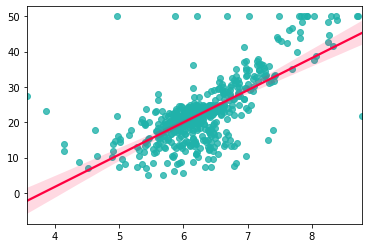

In [12]:
sns.regplot(x= X, y = y, color = "#20B2AA", line_kws = {"color": "#FF0040"})

___

## *Conclusión*

+ Mucha gente usa modelos de regresión lineal. Esto significa que en muchos lugares se acepta para el modelado predictivo y la realización de inferencias. Existe un alto nivel de experiencia y conocimientos colectivos, incluidos materiales didácticos sobre modelos de regresión lineal e implementaciones de software. La regresión lineal se puede encontrar en [R](https://www.r-project.org), [Python](https://www.python.org), [Java](https://www.java.com/es/), [Julia](https://julialang.org), [Scala](https://www.scala.com/en), [Javascript](https://www.javascript.com), ...
+ Matemáticamente, es sencillo implementar y programar este método y tiene la garantía de encontrar una solución óptima (*bajo el supuesto de que todos los supuestos del modelo de regresión lineal se cumplen con los datos*).
+ La regresión lineal es un tipo de análisis predictivo básico y de uso común. La idea general de la regresión es examinar dos cosas:
    + Un conjunto de variables predictoras que hagan un buen trabajo al predecir una variable de resultado(*dependiente*).
    + Observar qué variables en particular son predictores significativos de la variable de resultado y de qué manera, indicada por la magnitud y el signo de las estimaciones, impactan en la variable de resultado.

<center>
    <img src="https://pbs.twimg.com/media/EETe0yOXsAA3eme.png" title="Extrapolation" alt="Extrapolation" width="400"
</center>

> "En algún lugar entre la regresión lineal simple y las redes neuronales profundas, creció hasta convertirse en un científico de datos" - Alguien en algún lugar y tiempo.

___

## *Referencias y enlaces de interés*

#### Bibliography

+ Carmona, F. (2005). Modelos lineales. Pub. Univ. de Barcelona, Barcelona.
+ Draper, N. R., & Smith, H. (1998). Applied regression analysis (Vol. 326). John Wiley & Sons.
+ Fox, J. (2015). Applied regression analysis and generalized linear models. Sage Publications.
+ Seber, G. A., & Lee, A. J. (2003). Wiley series in probability and statistics. Linear Regression Analysis, 36-44.

#### Tutorials

+ [AprendeMachineLearning.com](https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/)
+ [Analyticslane.com](https://www.analyticslane.com/2018/12/21/implementacion-del-metodo-descenso-del-gradiente-en-python/)

#### Tools

+ https://nbviewer.jupyter.org
+ https://htmlpreview.github.io